In [1]:
import pandas as pd
from networkx.algorithms.bipartite import color

from benchmark import benchmark_one_agent
from benchmark import benchmark_budget_incr
import matplotlib.pyplot as plt




# Execution of algorithms and diffusion models with visualization of the execution time and spread value

In [5]:
# Input parameters
FILE='../data/network.txt'
algorithms = ['group-pr','degdis']
diffusion_models = ['ic']
budget = 5
r = 1

In [3]:
# Run Benchmark for all the algorithms
df_result= pd.DataFrame()
for algo in algorithms:
    for diffusion_model in diffusion_models:
        df_result_tmp = benchmark_one_agent(FILE, algo, diffusion_model, budget, r)
        df_result = pd.concat([df_result, df_result_tmp],ignore_index=True)
df_result['algo_diffusion'] = df_result['algorithm'] + ' - ' + df_result['diffusion_model']




Simulations: 100%|██████████| 1/1 [00:00<00:00, 626.86it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 556.64it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 728.05it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 1368.45it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 1347.35it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 20.93it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 1223.19it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 1285.81it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 879.12it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 1031.30it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 571.98it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 830.56it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 984.58it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 937.27it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 716.73it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 799.83it/s]

Simulations: 100%|█

In [4]:
print(df_result)

  diffusion_model algorithm      time                  seed  spread  \
0              ic  group-pr  0.388174  [52, 58, 48, 53, 62]    28.0   
1              lt  group-pr  0.196177  [52, 58, 48, 53, 62]    40.0   
2              ic    degdis  0.013608  [58, 52, 38, 41, 48]    32.0   
3              lt    degdis  0.009815  [58, 52, 38, 41, 48]    26.0   
4              ic  mcgreedy  1.355706  [44, 56, 28, 40, 30]    17.0   
5              lt  mcgreedy  1.525411  [56, 58, 50, 53, 48]    35.0   

  algo_diffusion  
0  group-pr - ic  
1  group-pr - lt  
2    degdis - ic  
3    degdis - lt  
4  mcgreedy - ic  
5  mcgreedy - lt  


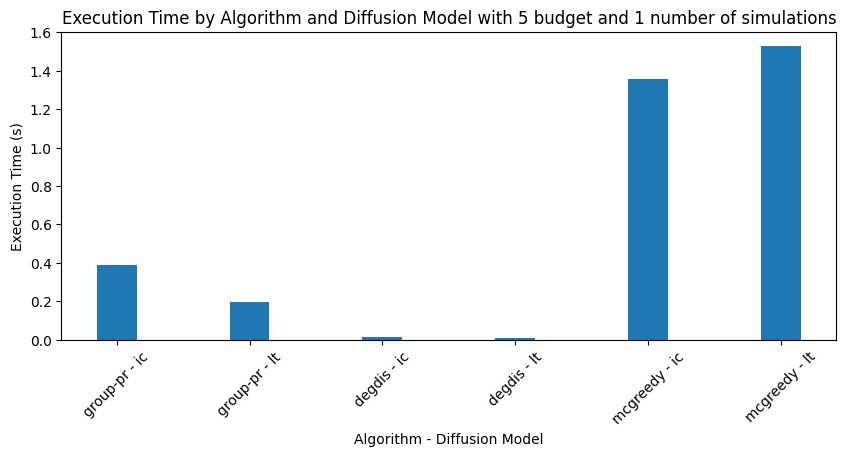

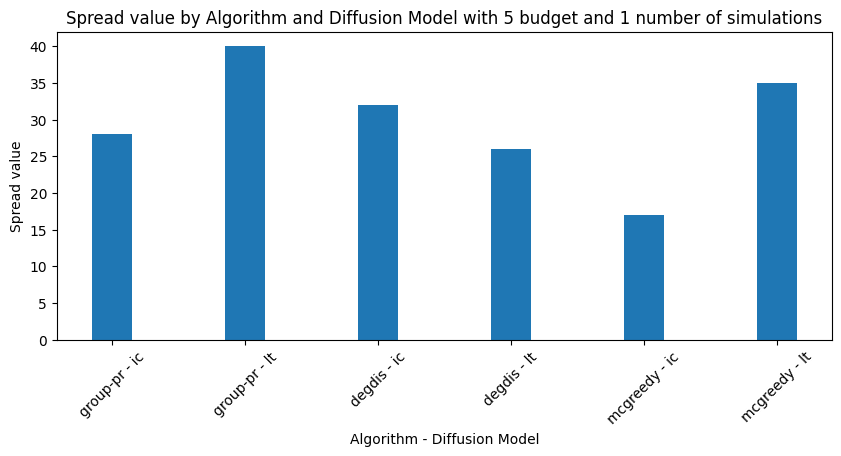

In [5]:
# Plot the execution time of the algorithms
plt.figure(figsize=(10, 4))
plt.bar(df_result['algo_diffusion'], df_result['time'],width=0.3)
plt.xlabel('Algorithm - Diffusion Model')
plt.ylabel('Execution Time (s)')
plt.title(f'Execution Time by Algorithm and Diffusion Model with {budget} budget and {r} number of simulations')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 4))
plt.bar(df_result['algo_diffusion'], df_result['spread'],width=0.3)
plt.xlabel('Algorithm - Diffusion Model')
plt.ylabel('Spread value')
plt.title(f'Spread value by Algorithm and Diffusion Model with {budget} budget and {r} number of simulations')
plt.xticks(rotation=45)
plt.show()


# Plot the spread for each pair (algorithm, diffusion model) with different budgets and verify graphically monotonicity and submodularity properties

In [13]:
# Input parameters
FILE='../data/network.txt'
algorithms = ['group-pr','degdis']
diffusion_models = ['ic']
budget = 5
r = 1


Simulations: 100%|██████████| 1/1 [00:00<00:00, 1151.96it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 1290.56it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 1665.07it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 908.45it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 732.89it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 1024.25it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 1442.33it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 482.05it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 1033.84it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 1157.69it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 1151.02it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 942.75it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 1538.07it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 1128.11it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 1473.75it/s]

Simulations: 100%|██████████| 1/1 [00:00<00:00, 1026.00it/s]

Simulations

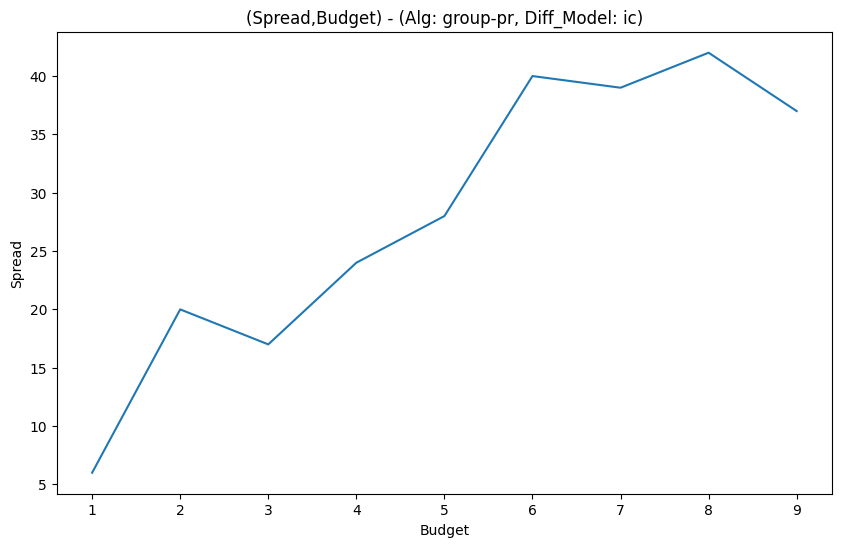

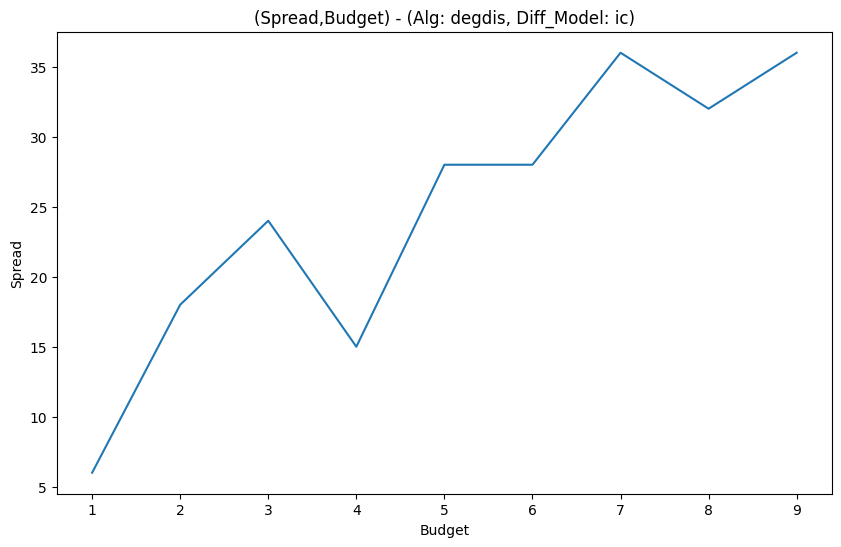

In [12]:
# Plot the spread of the algorithm for each algorithm
df_result_budget_incr= pd.DataFrame()
for algo in algorithms:
    for diffusion_model in diffusion_models:
        df_result_budget_incr_tmp= benchmark_budget_incr(FILE, algo, diffusion_model,budget=range(1,10), r=1)
        df_result_budget_incr = pd.concat([df_result_budget_incr, df_result_budget_incr_tmp],ignore_index=True)
        


for algo in algorithms:
    for diffusion_model in diffusion_models:
        plt.figure(figsize=(10, 6))
        
        curr_plot= df_result_budget_incr[(df_result_budget_incr['algorithm']==algo) & (df_result_budget_incr['diffusion_model']==diffusion_model)]
        plt.plot(curr_plot['budget'], curr_plot['spread'])
        plt.xlabel('Budget')
        plt.ylabel('Spread')
        plt.title('(Spread,Budget) - ' + '(Alg: '+algo +', Diff_Model: ' +diffusion_model+')')
        plt.show()


NameError: name 'curr_plot' is not defined